In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast 

# import os
# if os.name == 'posix' :
#     plt.rc('font', family='AppleGothic')
# else :
#     plt.rc('font', family='Malgun Gothic')
    
plt.rc('axes', unicode_minus=False)

plt.rcParams['font.family'] = 'NanumGothic' 
plt.rcParams['axes.unicode_minus'] = False
import koreanize_matplotlib

In [66]:
# 검정을 위해 필요한 라이브러리
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind, mannwhitneyu

# 하위 지표 찾기

## 데이터 불러오기

### 통합 데이터 

In [4]:
master_df = pd.read_csv('./integrated_master_data.csv')
master_df.head()

,Unnamed: 0,user_id,total_votes,unique_days,first_vote,last_vote,active_days,cohort_day,retention_day8,ret_group,...,opposite_sex_vote_received_ratio,candidate_count,chosen_count,ratio,address,student_count,school_type,firstquestion_id,first_question_text,first_question_category
0,0,838023,22,5,2023-04-29,2023-05-04,5,2023-04-29,0.515152,50 이상,...,0.125954,27.0,10.0,0.370370,충청남도 천안시 서북구,491,H,121,가장 어른스러운 사람은?,['심리' '성격' '인간관계']
1,1,838466,127,6,2023-05-02,2023-05-07,5,2023-05-02,0.569444,50 이상,...,0.134111,82.0,37.0,0.451220,충청남도 아산시,578,H,298,옷이 제일 많을 거 같은 사람은?,['일상' '스타일' '관찰']
2,2,838642,1,1,2023-04-29,2023-04-29,0,2023-04-29,0.515152,50 이상,...,0.100000,44.0,5.0,0.113636,충청남도 천안시 서북구,491,H,161,화목한 가정을 꾸릴거 같은 사람은?,['일상' '라이프스타일' '인간관계']
3,3,839357,205,8,2023-04-29,2023-05-07,8,2023-04-29,0.515152,50 이상,...,0.797688,42.0,10.0,0.238095,충청남도 천안시 서북구,491,H,179,책을 제일 많이 읽은 것 같은 사람은?,['일상' '지식' '관찰']
4,4,840293,170,7,2023-05-03,2023-05-15,12,2023-05-03,0.422977,50 미만,...,0.207469,74.0,31.0,0.418919,충청남도 아산시,578,H,464,뭔가 제대로 한 번 보여줄 것 같은 사람은?,['성격' '미래' '관찰']


In [5]:
master_df.columns

Index(['Unnamed: 0', 'user_id', 'total_votes', 'unique_days', 'first_vote',
       'last_vote', 'active_days', 'cohort_day', 'retention_day8', 'ret_group',
       'ret_group_over', 'ret_group_under', 'gender', 'group_id', 'school_id',
       'grade', 'votes_within_3d_count', 'reported_user_count',
       'vote_nunique_user_count', 'period_friend_count', 'sign_up_date',
       'first_vote_date', 'first_point_use_date', 'first_point_use_amount',
       'vote_sameday_signup', 'days_to_vote', 'days_to_point',
       'days_to_point_after_vote', 'first_vote_hour',
       'first_voteday_question_count', 'total_voted', 'total_read',
       'opposite_sex_votes_received_count', 'opposite_sex_vote_received_ratio',
       'candidate_count', 'chosen_count', 'ratio', 'address', 'student_count',
       'school_type', 'firstquestion_id', 'first_question_text',
       'first_question_category'],
      dtype='object')

## cohort

- 상위 25%
    - 날짜 :  04.30, 05.02, 05.09, 05.10, 05.12, 05.20, 05.21
    - 행 개수 : 18,795개
    - 인원 수 : 1,253명
- 하위 25%
    - 05.04, 05.05, 05.06, 05.15, 05.16, 05.17, 05.24
    - 행 개수 : 18,660개
    - 인원 수 : 1,244명

In [6]:
# 25% 기준으로 날짜 나누기
upper25_days = ['2023-04-30', '2023-05-02', '2023-05-09', '2023-05-10', '2023-05-12', '2023-05-20', '2023-05-21']
lower25_days = ['2023-05-04', '2023-05-05', '2023-05-06', '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-24']

In [11]:
### 상위
# 상위 25% 그룹 나누기
cohort_upper25_df = master_df[master_df['first_vote'].isin(upper25_days)]

# 상위 25%의 유저 id 리스트로 정리
upper25_user_list = list(cohort_upper25_df['user_id'].unique())


### 하위
# 하위 25% 그룹 나누기
cohort_lower25_df = master_df[master_df['first_vote'].isin(lower25_days)]

# 하위 25%의 유저 id 리스트로 정리
lower25_user_list = list(cohort_lower25_df['user_id'].unique())

In [13]:
# 각 코호트별 유저 수 확인해보기

print(f"리텐션 상위 25% 그룹 유저 수 : {len(upper25_user_list)}")
print(f"리텐션 하위 25% 그룹 유저 수 : {len(lower25_user_list)}")

리텐션 상위 25% 그룹 유저 수 : 1253
리텐션 하위 25% 그룹 유저 수 : 1244


---

## 25%로 나눈 cohort별 지표 비교해보기

### 중학생? 고등학생?

In [18]:
# 상위 25%
school_type_rate_upper25 = cohort_upper25_df['school_type'].value_counts().reset_index()
school_type_rate_upper25['rate'] = school_type_rate_upper25['count'] / len(lower25_user_list)
school_type_rate_upper25

,school_type,count,rate
0,H,803,0.645498
1,M,450,0.361736


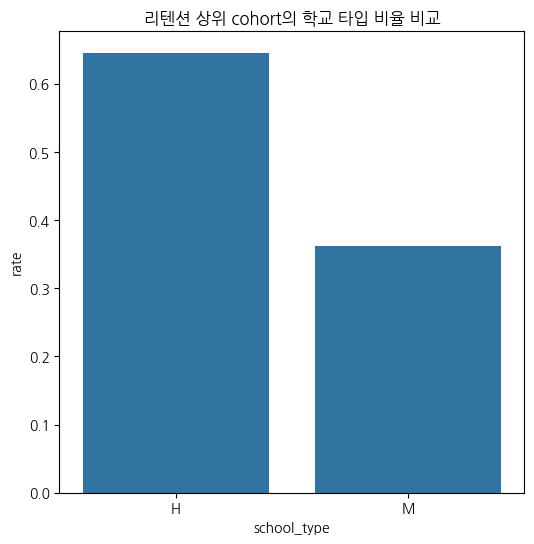

In [22]:
# 시각화
plt.figure(figsize=(6,6))
sns.barplot(data=school_type_rate_upper25, x='school_type', y='rate')
plt.title('리텐션 상위 cohort의 학교 타입 비율 비교')
plt.show()

In [19]:
# 하위 25%
school_type_rate_lower25 = cohort_lower25_df['school_type'].value_counts().reset_index()
school_type_rate_lower25['rate'] = school_type_rate_lower25['count'] / len(upper25_user_list)
school_type_rate_lower25

,school_type,count,rate
0,H,1187,0.947326
1,M,57,0.045491


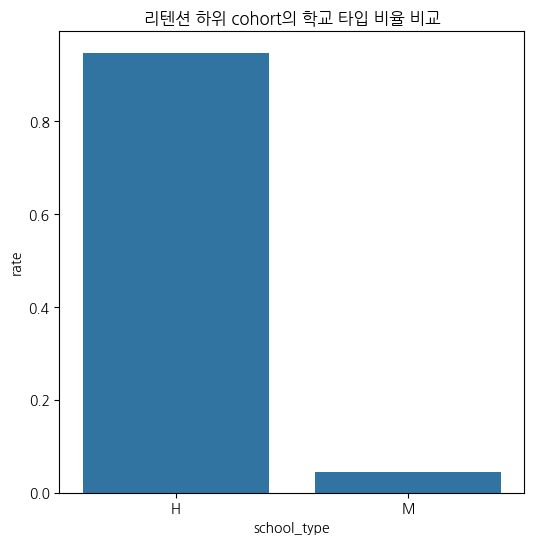

In [23]:
# 시각화
plt.figure(figsize=(6,6))
sns.barplot(data=school_type_rate_lower25, x='school_type', y='rate')
plt.title('리텐션 하위 cohort의 학교 타입 비율 비교')
plt.show()

### 마스터 테이블에 cohort 추가하기

In [29]:
# cohort 추가한 데이터프레임 만들기
master_cohort_df = master_df.copy()

# 상위 25% 유저는 1, 하위 25% 유저는 2, 아니면 결측값 넣기
master_cohort_df['cohort'] = master_cohort_df['user_id'].apply(
    lambda x : 1 if x in upper25_user_list
    else 2 if x in lower25_user_list
    else np.nan
)

master_cohort_df.head()

,Unnamed: 0,user_id,total_votes,unique_days,first_vote,last_vote,active_days,cohort_day,retention_day8,ret_group,...,candidate_count,chosen_count,ratio,address,student_count,school_type,firstquestion_id,first_question_text,first_question_category,cohort
0,0,838023,22,5,2023-04-29,2023-05-04,5,2023-04-29,0.515152,50 이상,...,27.0,10.0,0.370370,충청남도 천안시 서북구,491,H,121,가장 어른스러운 사람은?,['심리' '성격' '인간관계'],NaN
1,1,838466,127,6,2023-05-02,2023-05-07,5,2023-05-02,0.569444,50 이상,...,82.0,37.0,0.451220,충청남도 아산시,578,H,298,옷이 제일 많을 거 같은 사람은?,['일상' '스타일' '관찰'],1.0
2,2,838642,1,1,2023-04-29,2023-04-29,0,2023-04-29,0.515152,50 이상,...,44.0,5.0,0.113636,충청남도 천안시 서북구,491,H,161,화목한 가정을 꾸릴거 같은 사람은?,['일상' '라이프스타일' '인간관계'],NaN
3,3,839357,205,8,2023-04-29,2023-05-07,8,2023-04-29,0.515152,50 이상,...,42.0,10.0,0.238095,충청남도 천안시 서북구,491,H,179,책을 제일 많이 읽은 것 같은 사람은?,['일상' '지식' '관찰'],NaN
4,4,840293,170,7,2023-05-03,2023-05-15,12,2023-05-03,0.422977,50 미만,...,74.0,31.0,0.418919,충청남도 아산시,578,H,464,뭔가 제대로 한 번 보여줄 것 같은 사람은?,['성격' '미래' '관찰'],NaN


### 리텐션이 높은 집단에는 중학생이 더 많이 포함되어 있을 것이다
	•	귀무가설(H₀): 중학생 비율(cohort 1) ≤ 중학생 비율(cohort 2)
	•	대립가설(H₁): 중학생 비율(cohort 1) > 중학생 비율(cohort 2)
- 이 차이가 통계적으로 유의한가?이런 차이가 우연히 발생할 확률이 얼마나 되냐? 를 확인하기 위해서 통계 검정 진행
- 검정 방법 : "중학생은 리텐션 높은 집단에 더 많을 것이다”를 확인하기 위한 단측 검정 수행 ->  Z-test 

In [ ]:
# 중학생 여부 컬럼 추가하기

# 원본 데이터 유지
master_cohort_middleschool_df = master_cohort_df.copy()

# 컬럼 추가
master_cohort_middleschool_df['middleschooler'] = master_cohort_middleschool_df['school_type'].apply(
    lambda x : 1 if x == 'M'
    else 0
)
master_cohort_middleschool_df.head()

,Unnamed: 0,user_id,total_votes,unique_days,first_vote,last_vote,active_days,cohort_day,retention_day8,ret_group,...,chosen_count,ratio,address,student_count,school_type,firstquestion_id,first_question_text,first_question_category,cohort,middleschooler
0,0,838023,22,5,2023-04-29,2023-05-04,5,2023-04-29,0.515152,50 이상,...,10.0,0.370370,충청남도 천안시 서북구,491,H,121,가장 어른스러운 사람은?,['심리' '성격' '인간관계'],NaN,0
1,1,838466,127,6,2023-05-02,2023-05-07,5,2023-05-02,0.569444,50 이상,...,37.0,0.451220,충청남도 아산시,578,H,298,옷이 제일 많을 거 같은 사람은?,['일상' '스타일' '관찰'],1.0,0
2,2,838642,1,1,2023-04-29,2023-04-29,0,2023-04-29,0.515152,50 이상,...,5.0,0.113636,충청남도 천안시 서북구,491,H,161,화목한 가정을 꾸릴거 같은 사람은?,['일상' '라이프스타일' '인간관계'],NaN,0
3,3,839357,205,8,2023-04-29,2023-05-07,8,2023-04-29,0.515152,50 이상,...,10.0,0.238095,충청남도 천안시 서북구,491,H,179,책을 제일 많이 읽은 것 같은 사람은?,['일상' '지식' '관찰'],NaN,0
4,4,840293,170,7,2023-05-03,2023-05-15,12,2023-05-03,0.422977,50 미만,...,31.0,0.418919,충청남도 아산시,578,H,464,뭔가 제대로 한 번 보여줄 것 같은 사람은?,['성격' '미래' '관찰'],NaN,0


In [56]:
master_cohort_middleschool_df['first_vote_hour'].value_counts()

first_vote_hour
13    460
14    407
12    405
10    386
11    348
15    338
8     318
9     306
7     213
6     188
4     177
23    177
5     164
3     152
16    147
1     118
2     109
22     86
17     80
0      66
18     24
21     19
19     10
20      5
Name: count, dtype: int64

In [36]:
# cohort별로 중학생 수 세기
count_group1 = master_cohort_middleschool_df[(master_cohort_middleschool_df["cohort"] == 1) & (master_cohort_middleschool_df["middleschooler"] == 1)].shape[0]
count_group2 = master_cohort_middleschool_df[(master_cohort_middleschool_df["cohort"] == 2) & (master_cohort_middleschool_df["middleschooler"] == 1)].shape[0]

# cohort별 전체 수 세기
nobs_group1 = master_cohort_middleschool_df[master_cohort_middleschool_df["cohort"] == 1].shape[0]
nobs_group2 = master_cohort_middleschool_df[master_cohort_middleschool_df["cohort"] == 2].shape[0]

# proportions_ztest 실행 - 단측 검정 (group1이 더 클 것이라는 가정)
count = [count_group1, count_group2]
nobs = [nobs_group1, nobs_group2]

zstat, pval = proportions_ztest(count, nobs, alternative='larger')

print(f"Z-statistic: {zstat:.2f}")
print(f"p-value: {pval:.4f}")

if pval < 0.05:
    print("중학생 비율이 리텐션 높은 그룹(cohort 1)에서 유의하게 더 높습니다.")
else:
    print("중학생 비율 차이가 유의하지 않습니다.")

Z-statistic: 19.46
p-value: 0.0000
중학생 비율이 리텐션 높은 그룹(cohort 1)에서 유의하게 더 높습니다.


- zstat은 두 비율 차이가 얼마나 큰지 표준 정규 분포 기준으로 수치화한 값.
- 즉, zstat이 클수록 → p-value는 작아짐 → 귀무가설 기각 가능성 높아짐
```
중학생은 리텐션 높은 집단에 더 많음.
중학생의 참여를 높이자!
```

#### 리텐션이 높았던 집단의 중학생과 낮은 집단의 중학생이 처음 접한 질문 카테고리에 차이가 있을까?

In [42]:
type(master_cohort_middleschool_df['first_question_category'].iloc[0])

str

In [52]:
master_cohort_middleschool_df['first_question_category'].iloc[0]

"['심리' '성격' '인간관계']"

In [53]:
# 상위 25% 집단 중 중학생의 첫 질문 카테고리 가져오기

middleschool_firstquestion_category_upper25 = master_cohort_middleschool_df[(master_cohort_middleschool_df['cohort']==1)&(master_cohort_middleschool_df['middleschooler']==1)]

# 문자열을 리스트로 바꿔주는 함수
def parse_category_string(s):
    if isinstance(s, str):
        # 1. 대괄호 제거
        s = s.strip()[1:-1]
        # 2. 작은따옴표 제거
        s = s.replace("'", "")
        # 3. 공백 기준 split
        return s.split()
    return s

# 리스트로 변환
middleschool_firstquestion_category_upper25['first_question_category'] = (
    middleschool_firstquestion_category_upper25['first_question_category'].apply(parse_category_string)
)

# 카테고리 펼치기
middleschool_firstquestion_category_upper25 = middleschool_firstquestion_category_upper25.explode('first_question_category')
# 순위 확인해보기
middleschool_firstquestion_category_upper25['first_question_category'].value_counts()

/tmp/ipykernel_1074938/1816540209.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middleschool_firstquestion_category_upper25['first_question_category'] = (


first_question_category
일상        277
인간관계      226
성격        178
관찰        136
심리         96
스타일        85
감성         60
상상         55
라이프스타일     51
미래         50
연애         40
대화         37
미디어        22
지식         21
운동         13
음식          2
성장          1
Name: count, dtype: int64

In [ ]:
# 하위 25% 집단 중 중학생의 첫 질문 카테고리 가져오기

middleschool_firstquestion_category_lower25 = master_cohort_middleschool_df[(master_cohort_middleschool_df['cohort']==2)&(master_cohort_middleschool_df['middleschooler']==1)]

# 문자열을 리스트로 바꿔주는 함수
def parse_category_string(s):
    if isinstance(s, str):
        # 1. 대괄호 제거
        s = s.strip()[1:-1]
        # 2. 작은따옴표 제거
        s = s.replace("'", "")
        # 3. 공백 기준 split
        return s.split()
    return s

# 리스트로 변환
middleschool_firstquestion_category_lower25['first_question_category'] = (
    middleschool_firstquestion_category_lower25['first_question_category'].apply(parse_category_string)
)
# 카테고리 펼치기
middleschool_firstquestion_category_lower25 = middleschool_firstquestion_category_lower25.explode('first_question_category')
# 순위 확인해보기
middleschool_firstquestion_category_lower25['first_question_category'].value_counts()

/tmp/ipykernel_1074938/3862275646.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middleschool_firstquestion_category_lower25['first_question_category'] = (


first_question_category
일상        34
인간관계      32
성격        22
관찰        12
심리        12
대화        10
라이프스타일     9
상상         9
스타일        6
연애         6
감성         6
미래         4
미디어        4
운동         3
지식         1
생존         1
Name: count, dtype: int64

---

#### 리텐션이 높았던 집단의 중학생과 낮은 집단의 중학생 사이 첫 투표 시간대에 차이가 있을까??

In [59]:
# 상위 25% 집단 중 중학생
middleschool_upper25 = master_cohort_middleschool_df[(master_cohort_middleschool_df['cohort']==1)&(master_cohort_middleschool_df['middleschooler']==1)]

# 하위 25% 집단 중 중학생
middleschool_lower25 = master_cohort_middleschool_df[(master_cohort_middleschool_df['cohort']==2)&(master_cohort_middleschool_df['middleschooler']==1)]


In [62]:
middleschool_upper25['first_vote_hour'].value_counts()

first_vote_hour
9     65
10    43
11    43
12    43
8     41
14    40
13    39
15    30
7     21
6     20
23    16
4     15
22    12
16    10
5      6
3      4
21     1
18     1
Name: count, dtype: int64

In [63]:
middleschool_lower25['first_vote_hour'].value_counts()

first_vote_hour
13    10
10     6
8      6
6      5
11     5
9      5
7      4
5      3
12     3
15     2
23     2
4      2
14     1
17     1
16     1
3      1
Name: count, dtype: int64

---

#### 리텐션이 높았던 집단의 중학생과 낮은 집단의 중학생 사이 투표받은 수는 차이가 있을까??

In [71]:
middleschool_upper25['chosen_count'].isna().sum()

8

In [70]:
middleschool_lower25['chosen_count'].isna().sum()

5

In [72]:
# t-test
group1 = master_cohort_middleschool_df[(master_cohort_middleschool_df['cohort']==1)&(master_cohort_middleschool_df['middleschooler']==1)]['chosen_count']
group2 = master_cohort_middleschool_df[(master_cohort_middleschool_df['cohort']==2)&(master_cohort_middleschool_df['middleschooler']==1)]['chosen_count']

# 결측값 제거 
group1 = group1.dropna()
group2 = group2.dropna()

# Welch's t-test (비등분산)
tstat, pval = ttest_ind(group1, group2, equal_var=False)
print(f"[Welch's t-test] t-stat: {tstat:.3f}, p-value: {pval:.4f}")

# Mann-Whitney U test (비모수)
u_stat, pval_u = mannwhitneyu(group1, group2, alternative='two-sided')
print(f"[Mann-Whitney U] U-stat: {u_stat:.3f}, p-value: {pval_u:.4f}")

[Welch's t-test] t-stat: 10.110, p-value: 0.0000
[Mann-Whitney U] U-stat: 17432.500, p-value: 0.0000


- Welch’s t-test는 평균을 비교하는 검정이므로: “cohort 1과 2의 chosen_count 평균이 유의미하게 다르다”고 해석.
- Mann-Whitney U test는 분포(특히 중위수)를 비교하는 비모수 검정이므로: “cohort 1과 2의 chosen_count 중앙값 또는 전체 분포가 유의미하게 다르다”고 해석.

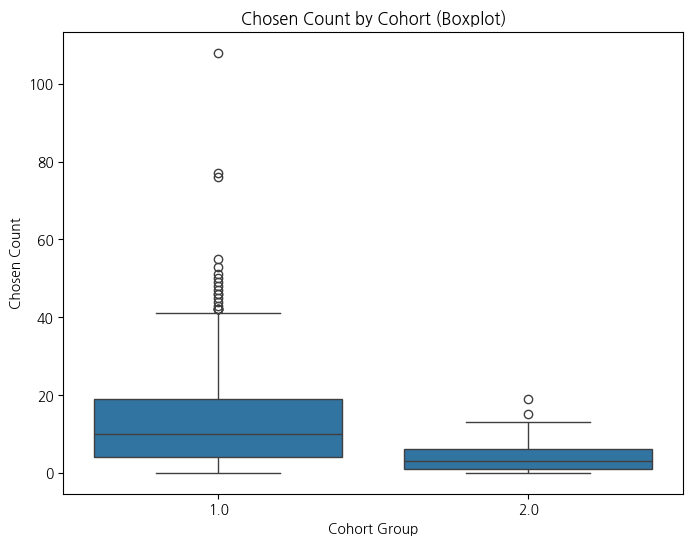

In [74]:
# 시각화

# 중학생 데이만 남기기
middleschool_df = master_cohort_middleschool_df[master_cohort_middleschool_df['middleschooler']==1]
# 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(x='cohort', y='chosen_count', data=middleschool_df)
plt.title('Chosen Count by Cohort (Boxplot)')
plt.xlabel('Cohort Group')
plt.ylabel('Chosen Count')
plt.show()

---